# Project Time!

In [12]:
# Import libraries

import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

# Load shark attack dataset

url = 'https://raw.githubusercontent.com/iSundhararajan/Shark_Attacks/main/GSAF5.csv'

shark_attack = pd.read_csv(url)

Previewing the dataframe and its characteristics

In [13]:
# Previewing the dataframe
shark_attack.head(5)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,...,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,...,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,...,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
shark_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6969 entries, 0 to 6968
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6944 non-null   object 
 1   Year            6942 non-null   float64
 2   Type            6926 non-null   object 
 3   Country         6894 non-null   object 
 4   State           6462 non-null   object 
 5   Location        6379 non-null   object 
 6   Activity        6358 non-null   object 
 7   Name            6724 non-null   object 
 8   Sex             6365 non-null   object 
 9   Age             3950 non-null   object 
 10  Injury          6909 non-null   object 
 11  Unnamed: 11     6382 non-null   object 
 12  Time            3418 non-null   object 
 13  Species         3812 non-null   object 
 14  Source          6925 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6819 non-null   object 
 17  href            6796 non-null   o

In [15]:
shark_attack.nunique()

Date              5973
Year               259
Type                12
Country            225
State              902
Location          4514
Activity          1587
Name              5683
Sex                  8
Age                169
Injury            4079
Unnamed: 11         12
Time               410
Species           1675
Source            5302
pdf               6789
href formula      6785
href              6776
Case Number       6777
Case Number.1     6775
original order    6797
Unnamed: 21          1
Unnamed: 22          2
dtype: int64

## Data Cleaning 

In [16]:
# cut all rows that are totally null
shark_attack=shark_attack.dropna(how='all')

In [17]:
shark_attack.Sex.unique() # we need to standardize the gender categories

#this is the code we used to correct and standardize sex column

corrections = {' M': 'M', 'M ':'M', 'M x 2':'M'}
shark_attack['Sex'] = shark_attack['Sex'].replace(corrections)

corrections = {'lli':'na', 'N':'na', '.':'na'}
shark_attack['Sex'] = shark_attack['Sex'].replace(corrections)

# we need to decide what to do with 'lli', 'N', '.' (we will treat these as null)

In [18]:
shark_attack['Sex'].value_counts()

Sex
M     5582
F      779
na       4
Name: count, dtype: int64

In [19]:
shark_attack.Type.unique() # we need to standardize the Type categories

corrections = {' Provoked':'Provoked'}
shark_attack['Type'] = shark_attack['Type'].replace(corrections)

'?', 'Unconfirmed', 'Unverified', 'Invalid'

corrections = {'?':'Unconfirmed', 'Unverified':'Unconfirmed', 
               'Invalid':'Unconfirmed', 'Under investigation':'Unconfirmed', 
               'Questionable':'Unconfirmed','Boat':'Watercraft'}
shark_attack['Type'] = shark_attack['Type'].replace(corrections)

shark_attack.Type.unique()

shark_attack.Type.value_counts()

Type
Unprovoked      5107
Provoked         637
Unconfirmed      578
Watercraft       362
Sea Disaster     242
Name: count, dtype: int64

In [20]:
shark_attack['Country']=shark_attack['Country'].str.upper() # Now we are going to clean the Country column

In [21]:

# Coast of AFRICA, EGYPT / ISRAEL, IRAN / IRAQ, ITALY / CROATIA,RED SEA / INDIAN OCEAN,SOLOMON ISLANDS / VANUATU'

"""
We have corrected the countries that were misspelled on our first review of the country list.
"""

corrections = {'Mexico':'MEXICO',' PHILIPPINES':'PHILIPPINES',' TONGA':'TONGA','CEYLON':'CEYLON (SRI LANKA)'
                ,'COLUMBIA':'COLOMBIA','EGYPT ':'EGYPT','Fiji':'FIJI','INDIAN OCEAN?':'INDIAN OCEAN',
               'MALDIVE ISLANDS':'MALDIVES','MEXICO ':'MEXICO','Maldives':'MALDIVES','MeXICO':'MEXICO',
               'NICARAGUA ':'NICARAGUA','NORTH ATLANTIC OCEAN ':'NORTH ATLANTIC OCEAN', 'New Zealand':'NEW ZEALAND',
               'OKINAWA':'JAPAN','PACIFIC OCEAN ':'PACIFIC OCEAN', 'RED SEA?':'RED SEA','REUNION':'REUNION ISLAND',
               'SAN DOMINGO':'SANTO DOMINGO','ST HELENA, British overseas territory':'ST HELENA','ST. MAARTIN':'ST MARTIN',
               'ST. MARTIN':'ST MARTIN','SUDAN?':'SUDAN','UNITED ARAB EMIRATES (UAE)':'UNITED ARAB EMIRATES','ENGLAND':'UNITED KINGDOM','SCOTLAND':'UNITED KINGDOM',
               'ST KITTS / NEVIS':'ST KITTS AND NEVIS','RED SEA / INDIAN OCEAN':'RED SEA','ANDAMAN / NICOBAR ISLANDAS':'ANDAMAN',
               'IRAN / IRAQ':'IRAN','SOUTHWEST PACIFIC OCEAN':'SOUTH PACIFIC OCEAN','ITALY / CROATIA':'ITALIA', 'YEMEN ':'YEMEN',
               'CEYLON (SRI LANKA)':'SRI LANKA','ASIA?':'ASIA',
              }

shark_attack['Country']=shark_attack['Country'].replace(corrections)

In [22]:
shark_attack['Country'].nunique()

193

In [23]:
# Fixing the Date column

shark_attack['Date']
shark_attack.isnull().sum()


Date                25
Year                27
Type                43
Country             75
State              507
Location           590
Activity           611
Name               245
Sex                604
Age               3019
Injury              60
Unnamed: 11        587
Time              3551
Species           3157
Source              44
pdf                170
href formula       150
href               173
Case Number        171
Case Number.1      172
original order     170
Unnamed: 21       6968
Unnamed: 22       6967
dtype: int64

In [24]:
shark_attack['Date'] = shark_attack['Date'].astype(str).str.replace('-', ' ')

In [25]:
formats = [
    "%d %b%Y",    # Example: 14Jun2023
    "%d %b %Y",   # Example: 14 Jun 2023
    "%Y%m%d",     # Example: 20230614
    "%d %B %Y",   # Example: 14 June 2023
    "%d %b%Y",    # Example: 14Jun'23
    "%d %b %Y",   # Example: 14 Jun '23
    "%d%b%Y",     # Example: 14Jun'23
    "%d%b %Y",    # Example: 14Jun '23
    "%d %b%y",    # Example: 14Jun23
    "%d %b %y",   # Example: 14 Jun 23
    "%d%b%y",     # Example: 14Jun23
    "%d%b %y",    # Example: 14Jun 23
]

for fmt in formats:
    try:
        shark_attack['Date'] = pd.to_datetime(shark_attack['Date'], format=fmt)
        break  # Stop trying once successful
    except ValueError:
        continue  # Try the next format if ValueError is raised

shark_attack['Date'] = pd.to_datetime(shark_attack['Date'], errors='coerce')
shark_attack['Date'][500:550] 

500   2019-06-02
501   2019-05-29
502   2019-05-25
503   2019-05-25
504   2019-05-20
505   2019-05-17
506   2019-05-14
507   2019-05-14
508   2018-05-09
509   2019-05-08
510   2019-05-07
511   2019-05-04
512   2019-05-01
513          NaT
514   2019-04-23
515   2019-04-21
516   2019-04-12
517   2019-04-06
518   2019-04-06
519   2019-04-05
520   2019-03-26
521   2019-03-25
522   2019-03-22
523   2019-03-21
524   2019-03-16
525   2019-03-12
526   2019-03-05
527   2019-03-05
528   2018-02-18
529   2019-02-17
530   2019-02-14
531   2019-02-10
532   2019-02-04
533   2019-02-04
534   2019-02-02
535   2019-02-02
536   2019-01-30
537   2019-01-29
538   2019-01-14
539   2019-01-10
540   2019-01-08
541   2018-12-18
542   2018-12-15
543   2018-12-15
544   2018-12-09
545   2018-12-09
546   2018-11-28
547   2018-11-24
548   2018-11-18
549   2018-11-17
Name: Date, dtype: datetime64[ns]

In [26]:
# Fixing the State column

shark_attack['State']=shark_attack['State'].str.upper()
shark_attack['State'].unique()

array(['QUEENSLAND', 'HAWAII', 'WESTERN AUSTRALIA', 'MAHARASHTRA', nan,
       'NEW  SOUTH WALES', 'PARADISE ISLAND', 'SOUTH AUSTRALIA',
       'EASTERN CAPE PROVINCE', 'SONORA', 'NEW SOUTH WALES',
       'SOUTH ISLAND', 'GUERRERO', 'NEW PROVIDENCE   ISOAD', 'JALISCO',
       'GRAND  BAHAMA ISLAND', 'FLORIDA', 'WESTERM AUSTRALIA',
       'NORTH ISLAND', 'SOUTHERN RED SEA', 'QUINTANA ROO',
       'BELIZE DISTRICT', 'CALIFORNIA', 'SOUTH CAROLINA', 'SOUTH SINAI',
       'BOLINAO', 'NORTH CAROLINA', 'VALENCIA', 'NORTE', "SAVAI'I ISLAND",
       'NEW YORK', 'SAN ANDRÉS ISLAND', 'GALAPAGOS ISLANDS',
       'RED SEA PROTECTORATE', 'FREEPORT', 'TAHITI', 'POUM',
       'PROVIDENCIALES ISLAND', 'LUCAYAN LUCAYAN ARCHIPELAGO',
       'NEW JERSEY', 'MAYABEQUE', 'EASTEN CAPE PROVINCE', 'ARTEMISA',
       'PERNAMBUCO', 'PRASLIN ISLAND', 'SOUTH PROVINCE', 'PATAGONIA',
       'TAVEUNI ISLAND', 'GULF OF CALIFORNIA', 'VAAVU ATOLL', 'KNZ',
       'NEW SOUTH ALES', 'SAMOA', 'TEXAS', 'LOUISIANA', 'MISSISSIP

In [27]:
# corrected States

corrections = {"QUEENSLAND": "QUEENSLAND",
  "HAWAII": "HAWAII",
  "MAHARASHTRA": "MAHARASHTRA",
  "NEW SOUTH WALES": "NEW SOUTH WALES",
  "WESTERN AUSTRALIA": "WESTERN AUSTRALIA",
  "NORTH CAROLINA": "NORTH CAROLINA",
  "GRAND BAHAMA ISLAND": "GRAND BAHAMA ISLAND",
  "FLORIDA": "FLORIDA",
  "EASTERN CAPE PROVINCE": "EASTERN CAPE PROVINCE",
  "TEXAS": "TEXAS",
  "SOUTH CAROLINA": "SOUTH CAROLINA",
  "VAAVU ATOLL": "VAAVU ATOLL",
  "SÃO PAULO": "SÃO PAULO",
  "MAYABEQUE": "MAYABEQUE",
  "ALABAMA": "ALABAMA",
  "WESTMORELAND PARISH": "WESTMORELAND PARISH",
  "CALIFORNIA": "CALIFORNIA",
  "PHANG NGA PROVINCE": "PHANG NGA PROVINCE",
  "NORTE": "NORTE",
  "WESTERN CAPE PROVINCE": "WESTERN CAPE PROVINCE",
  "MISSISSIPPI": "MISSISSIPPI",
  "SOLOMON ISLAND": "SOLOMON ISLAND",
  "EASTERN SAMAR": "EASTERN SAMAR",
  "LEYTE": "LEYTE",
  "TAHITI": "TAHITI",
  "TOKYO PREFECTURE": "TOKYO PREFECTURE",
  "NORTHERN TERRITORY": "NORTHERN TERRITORY",
  "NORTHERN IRELAND": "NORTHERN IRELAND",
  "NORTH RHINE-WESTPHALIA": "NORTH RHINE-WESTPHALIA",
  "NEWFOUNDLAND AND LABRADOR": "NEWFOUNDLAND AND LABRADOR",
  "EAST JAVA": "EAST JAVA",
  "GUANGXI": "GUANGXI",
  "SAN LUIS POTOSÍ": "SAN LUIS POTOSÍ",
  "CHIAPAS": "CHIAPAS",
  "GUANAJUATO": "GUANAJUATO",
  "VERACRUZ": "VERACRUZ",
  "YUCATÁN": "YUCATÁN",
  "SINALOA": "SINALOA",
  "AGUASCALIENTES": "AGUASCALIENTES",
  "COAHUILA": "COAHUILA",
  "TABASCO": "TABASCO",
  "HIDALGO": "HIDALGO",
  "QUERÉTARO": "QUERÉTARO",
  "NAYARIT": "NAYARIT",
  "QUINTANA ROO": "QUINTANA ROO",
  "CAMPECHE": "CAMPECHE",
  "ZACATECAS": "ZACATECAS",
  "MEXICO CITY": "MEXICO CITY",
  "MÉXICO STATE": "MÉXICO STATE",
  "DURANGO": "DURANGO",
  "BAJA CALIFORNIA SUR": "BAJA CALIFORNIA SUR",
  "TLAXCALA": "TLAXCALA",
  "COLIMA": "COLIMA",
  "MICHOACÁN": "MICHOACÁN",
  "GUERRERO": "GUERRERO",
  "PUEBLA": "PUEBLA",
  "MORELOS": "MORELOS",
  "CENTRAL JAVA": "CENTRAL JAVA",
  }

shark_attack['State']=shark_attack['State'].replace(corrections)

In [28]:
shark_attack.isnull().sum()

Date              1592
Year                27
Type                43
Country             75
State              507
Location           590
Activity           611
Name               245
Sex                604
Age               3019
Injury              60
Unnamed: 11        587
Time              3551
Species           3157
Source              44
pdf                170
href formula       150
href               173
Case Number        171
Case Number.1      172
original order     170
Unnamed: 21       6968
Unnamed: 22       6967
dtype: int64

In [29]:
# Getting rid of the space in the Species column title
shark_attack.rename(columns= {'Species ': 'Species'}, inplace=True)
shark_attack.columns

shark_attack['Species'].value_counts()

Species
White shark                                                                                                                      194
Shark involvement prior to death was not confirmed                                                                               105
Invalid                                                                                                                          102
Shark involvement not confirmed                                                                                                   92
Tiger shark                                                                                                                       89
                                                                                                                                ... 
1.2 m to 1.8 m [4' to 6'] shark                                                                                                    1
Grey nurse shark, 3 m female                                 

In [30]:
shark_attack['Age'].isnull().sum()

3019

In [31]:
shark_attack['Age'].unique()

array(['13', nan, '11', '46', '32', '29', '10', '64', '62', '39', '22',
       '15', '16', '21', '66', '52', '20', '44', '26', '47', '55', '30',
       '59', '8', '50', '45', '34', '38', '30s', '37', '9', '19', '20/30',
       '35', '65', '20s', '77', '60', '49', '42', '!2', '24', '73', '25',
       '18', '50s', '58', '67', '17', '14', '6', '41', '53', '68', '43',
       '40', '51', '31', '33', '28', '40s', 'teen', '56', 'Teen', '12',
       '36', 'M', '27', '57', '!6', '!!', '7', '71', '48', '54', '75',
       '45 and 15', '61', '70', '23', '4', '63', '28 & 22', '22, 57, 31',
       '60s', "20's", '74', '9 & 60', 'a minor', '69', '3', '82', '72',
       '18 months', '28 & 26', '5', '86', '18 or 20', '12 or 13',
       '46 & 34', '28, 23 & 30', 'Teens', '36 & 26', '8 or 10', '84',
       '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '33 or 37', 'mid-30s',
       '23 & 20', ' 30', '7      &    31', ' 28', '20?', "60's",
       '32 & 30', '16 to 18', '87', 'Elderly', 'mid-20s', 'Ca. 33', '74

In [32]:
# Fixing the Age column

#age column was converted to float
shark_attack['Age'] = pd.to_numeric(shark_attack['Age'], errors='coerce')


mean_age = shark_attack['Age'].mean()


# Fill missing age values with the mean age
shark_attack['Age'].fillna(mean_age, inplace=True)



In [33]:
shark_attack['Age'].isnull().sum()

0

In [34]:
shark_attack['Age'].unique()

array([13.        , 28.04295443, 11.        , 46.        , 32.        ,
       29.        , 10.        , 64.        , 62.        , 39.        ,
       22.        , 15.        , 16.        , 21.        , 66.        ,
       52.        , 20.        , 44.        , 26.        , 47.        ,
       55.        , 30.        , 59.        ,  8.        , 50.        ,
       45.        , 34.        , 38.        , 37.        ,  9.        ,
       19.        , 35.        , 65.        , 77.        , 60.        ,
       49.        , 42.        , 24.        , 73.        , 25.        ,
       18.        , 58.        , 67.        , 17.        , 14.        ,
        6.        , 41.        , 53.        , 68.        , 43.        ,
       40.        , 51.        , 31.        , 33.        , 28.        ,
       56.        , 12.        , 36.        , 27.        , 57.        ,
        7.        , 71.        , 48.        , 54.        , 75.        ,
       61.        , 70.        , 23.        ,  4.        , 63.  

In [35]:
shark_attack.isnull().sum()

Date              1592
Year                27
Type                43
Country             75
State              507
Location           590
Activity           611
Name               245
Sex                604
Age                  0
Injury              60
Unnamed: 11        587
Time              3551
Species           3157
Source              44
pdf                170
href formula       150
href               173
Case Number        171
Case Number.1      172
original order     170
Unnamed: 21       6968
Unnamed: 22       6967
dtype: int64

In [36]:
# Filling Sex column missing values

shark_attack['Sex'].value_counts()

# Number of NaNs in the 'Sex' column
nans_to_fill = shark_attack['Sex'].isna().sum()

# Calculate how many should be 'M' (Male) and 'F' (Female)
n_males = int(0.88 * nans_to_fill)
n_females = nans_to_fill - n_males

values_to_fill = ['M'] * n_males + ['F'] * n_females

# Shuffle the list to randomize the distribution
np.random.shuffle(values_to_fill)

# Fill NaN values in the 'Sex' column
shark_attack.loc[shark_attack['Sex'].isna(), 'Sex'] = values_to_fill

shark_attack['Sex'].value_counts()

Sex
M     6113
F      852
na       4
Name: count, dtype: int64

In [37]:
# Dropping the columns we decided we are not going to use because they are not relevant for our analysis.

shark_attack=shark_attack.drop('Unnamed: 21', axis=1)
shark_attack=shark_attack.drop('Unnamed: 22', axis=1)
shark_attack=shark_attack.drop('Time', axis=1)
shark_attack=shark_attack.drop('Species', axis=1)
shark_attack=shark_attack.drop('Case Number.1', axis=1)
shark_attack=shark_attack.drop('original order', axis=1)
shark_attack=shark_attack.drop('pdf', axis=1)
shark_attack=shark_attack.drop('href', axis=1)
shark_attack=shark_attack.drop('href formula', axis=1)
shark_attack=shark_attack.drop('Case Number', axis=1)
shark_attack=shark_attack.drop('Unnamed: 11', axis=1)
shark_attack=shark_attack.drop('Source', axis=1)
shark_attack=shark_attack.drop('Year', axis=1)
shark_attack=shark_attack.drop('Injury', axis=1)
shark_attack=shark_attack.drop('Name', axis=1)
shark_attack=shark_attack.drop('Activity', axis=1)

shark_attack=shark_attack.dropna(thresh=6)


In [38]:
shark_attack.isnull().sum()

Date        1141
Type          13
Country        2
State        128
Location     150
Sex            0
Age            0
dtype: int64

In [39]:
#Previewing the cleaned dataframe
shark_attack.head()

,Date,Type,Country,State,Location,Sex,Age
0,2024-03-15,Unprovoked,AUSTRALIA,QUEENSLAND,Bargara Beach,F,13.000000
1,2024-03-04,Unprovoked,USA,HAWAII,"Old Man's, Waikiki",M,28.042954
2,2024-03-02,Unprovoked,USA,HAWAII,"Rainbows, Oahu",F,11.000000
3,2024-02-25,Unprovoked,AUSTRALIA,WESTERN AUSTRALIA,"Sandlnd Island, Jurian Bay",F,46.000000
4,2024-02-14,Unprovoked,INDIA,MAHARASHTRA,"Vaitarna River, Palghar District",M,32.000000


In [40]:
#map countries to regions so we can look at attacks by regions

region_mapping = {
    'AUSTRALIA': 'Oceania',
    'USA': 'North America',
    'INDIA': 'Southern Asia',
    'TRINIDAD': 'Caribbean',
    'BAHAMAS': 'Caribbean',
    'SOUTH AFRICA': 'Southern Africa',
    'MEXICO': 'North America',
    'NEW ZEALAND': 'Oceania',
    'EGYPT': 'Northern Africa',
    'BELIZE': 'Central America',
    'PHILIPPINES': 'Southeastern Asia',
    'CORAL SEA': 'Oceania',
    'SPAIN': 'Southern Europe',
    'PORTUGAL': 'Southern Europe',
    'SAMOA': 'Polynesia',
    'COLOMBIA': 'South America',
    'ECUADOR': 'South America',
    'FRENCH POLYNESIA': 'Polynesia',
    'NEW CALEDONIA': 'Melanesia',
    'TURKS AND CAICOS': 'Caribbean',
    'CUBA': 'Caribbean',
    'BRAZIL': 'South America',
    'SEYCHELLES': 'Eastern Africa',
    'ARGENTINA': 'South America',
    'FIJI': 'Melanesia',
    'MALDIVES': 'Southern Asia',
    'ENGLAND': 'Northern Europe', 
    'JAPAN': 'Eastern Asia',
    'INDONESIA': 'Southeastern Asia',
    'JAMAICA': 'Caribbean',
    'THAILAND': 'Southeastern Asia',
    'COLUMBIA': 'South America', 
    'COSTA RICA': 'Central America',
    'BRITISH OVERSEAS TERRITORY': 'Various',
    'CANADA': 'North America',
    'JORDAN': 'Western Asia',
    'ST KITTS / NEVIS': 'Caribbean',
    'ST MARTIN': 'Caribbean',
    'PAPUA NEW GUINEA': 'Melanesia',
    'REUNION ISLAND': 'Eastern Africa',
    'ISRAEL': 'Western Asia',
    'CHINA': 'Eastern Asia',
    'IRELAND': 'Northern Europe',
    'ITALY': 'Southern Europe',
    'MALAYSIA': 'Southeastern Asia',
    'LIBYA': 'Northern Africa',
    'MAURITIUS': 'Eastern Africa',
    'SOLOMON ISLANDS': 'Melanesia',
    'ST HELENA, BRITISH OVERSEAS TERRITORY': 'Western Africa',
    'COMOROS': 'Eastern Africa',
    'REUNION': 'Eastern Africa',
    'UNITED KINGDOM': 'Northern Europe',
    'UNITED ARAB EMIRATES': 'Western Asia',
    'CAPE VERDE': 'Western Africa',
    'DOMINICAN REPUBLIC': 'Caribbean',
    'CAYMAN ISLANDS': 'Caribbean',
    'ARUBA': 'Caribbean',
    'MOZAMBIQUE': 'Eastern Africa',
    'PUERTO RICO': 'Caribbean',
    'ATLANTIC OCEAN': 'Various',
    'GREECE': 'Southern Europe',
    'FRANCE': 'Western Europe',
    'TRINIDAD & TOBAGO': 'Caribbean',
    'KIRIBATI': 'Micronesia',
    'DIEGO GARCIA': 'Eastern Africa', 
    'TAIWAN': 'Eastern Asia',
    'PALESTINIAN TERRITORIES': 'Western Asia',
    'GUAM': 'Micronesia',
    'NIGERIA': 'Western Africa',
    'TONGA': 'Polynesia',
    'SCOTLAND': 'Northern Europe', 
    'CROATIA': 'Southern Europe',
    'SAUDI ARABIA': 'Western Asia',
    'CHILE': 'South America',
    'ANTIGUA': 'Caribbean',
    'KENYA': 'Eastern Africa',
    'RUSSIA': 'Eastern Europe',
    'TURKS & CAICOS': 'Caribbean',
    'AZORES': 'Southern Europe', 
    'SOUTH KOREA': 'Eastern Asia',
    'MALTA': 'Southern Europe',
    'VIETNAM': 'Southeastern Asia',
    'MADAGASCAR': 'Eastern Africa',
    'PANAMA': 'Central America',
    'SOMALIA': 'Eastern Africa',
    'NEVIS': 'Caribbean',
    'BRITISH VIRGIN ISLANDS': 'Caribbean',
    'NORWAY': 'Northern Europe',
    'SENEGAL': 'Western Africa',
    'YEMEN': 'Western Asia',
    'GULF OF ADEN': 'Various', 
    'SIERRA LEONE': 'Western Africa',
    'ST. MAARTIN': 'Caribbean',
    'GRAND CAYMAN': 'Caribbean',
    'LIBERIA': 'Western Africa',
    'VANUATU': 'Melanesia',
    'HONDURAS': 'Central America',
    'VENEZUELA': 'South America',
    'SRI LANKA': 'Southern Asia',
    'URUGUAY': 'South America',
    'MICRONESIA': 'Micronesia',
    'CARIBBEAN SEA': 'Caribbean',
    'OKINAWA': 'Eastern Asia', 
    'TANZANIA': 'Eastern Africa',
    'MARSHALL ISLANDS': 'Micronesia',
    'EGYPT / ISRAEL': 'Various', 
    'NORTHERN ARABIAN SEA': 'Various', 
    'HONG KONG': 'Eastern Asia',
    'EL SALVADOR': 'Central America',
    'ANGOLA': 'Middle Africa',
    'BERMUDA': 'North America',
    'MONTENEGRO': 'Southern Europe',
    'IRAN': 'Western Asia',
    'TUNISIA': 'Northern Africa',
    'NAMIBIA': 'Southern Africa',
    'NORTH ATLANTIC OCEAN': 'Various',
    'SOUTH CHINA SEA': 'Southeastern Asia',
    'BANGLADESH': 'Southern Asia',
    'PALAU': 'Micronesia',
    'WESTERN SAMOA': 'Polynesia',
    'PACIFIC OCEAN': 'Various',
    'BRITISH ISLES': 'Northern Europe',
    'IRAQ': 'Western Asia',
    'TURKEY': 'Western Asia',
    'SINGAPORE': 'Southeastern Asia',
    'NEW BRITAIN': 'Oceania', 
    'SUDAN': 'Northern Africa',
    'JOHNSTON ISLAND': 'Oceania', 
    'SOUTH PACIFIC OCEAN': 'Various',
    'NEW GUINEA': 'Melanesia',
    'RED SEA': 'Various', 
    'NORTH PACIFIC OCEAN': 'Various',
    'FEDERATED STATES OF MICRONESIA': 'Micronesia',
    'MID ATLANTIC OCEAN': 'Various',
    'ADMIRALTY ISLANDS': 'Melanesia', 
    'BRITISH WEST INDIES': 'Caribbean',
    'SOUTH ATLANTIC OCEAN': 'Various',
    'PERSIAN GULF': 'Western Asia',
    'RED SEA / INDIAN OCEAN': 'Various',
    'NORTH SEA': 'Northern Europe',
    'NICARAGUA': 'Central America',
    'MALDIVE ISLANDS': 'Southern Asia',
    'AMERICAN SAMOA': 'Polynesia',
    'ANDAMAN / NICOBAR ISLANDAS': 'Southern Asia',
    'GABON': 'Middle Africa',
    'CEYLON (SRI LANKA)': 'Southern Asia'
}


# Creating new column: Region
shark_attack['Region']=shark_attack['Country'].map(region_mapping)


In [41]:
# Cleaning USA States values
shark_attack[shark_attack['Country'] == 'USA']['State'].unique()

array(['HAWAII', 'FLORIDA', 'CALIFORNIA', 'SOUTH CAROLINA',
       'NORTH CAROLINA', 'NEW YORK', 'NEW JERSEY', 'SAMOA', 'TEXAS',
       'LOUISIANA', 'MISSISSIPPI', 'NOIRTH CAROLINA', 'GEORGIA',
       'ALABAMA', 'MARYLAND', 'BAHAMAS', 'MAUI', 'OREGON',
       'FRANKLIN COUNTY, FLORIDA', 'VIRGIN ISLANDS', 'MAINE', 'DELAWARE',
       'GUAM', 'CAYMAN ISLANDS', 'RHODE ISLAND', 'MASSACHUSETTS',
       'WASHINGTON', 'PALMYRA ATOLL', 'PUERTO RICO', 'VIRGINIA',
       'US VIRGIN ISLANDS', 'KENTUCKY', 'NEW MEXICO', 'SOUTH CAROLINA ',
       'JOHNSTON ATOLL', 'ALASKA', 'MISSOURI', nan, 'NORTH CAROLINA ',
       'CAROLINA COAST', 'FLORIDA ', 'CONNECTICUT', 'PENNSYLVANIA',
       'ILLINOIS', 'WAKE ISLAND', ' NORTH CAROLINA', 'MIDWAY ATOLL',
       ' NEW JERSEY', 'NEW YORK ', 'CUBA'], dtype=object)

In [42]:
shark_attack['State'] = shark_attack['State'].str.strip()

In [43]:
corrections = {
    'NOIRTH CAROLINA': 'NORTH CAROLINA',
    'FRANKLIN COUNTY, FLORIDA': 'FLORIDA',
    'CAROLINA COAST': 'NORTH CAROLINA',
    'NORTH CAROLINA ': 'NORTH CAROLINA',
    'NEW YORK ': 'NEW YORK',
    'NEW JERSEY ': 'NEW JERSEY',
    'FLORIDA ': 'FLORIDA',
    'SOUTH CAROLINA ': 'SOUTH CAROLINA',
    'MAUI': 'HAWAII',  
    'VIRGIN ISLANDS': 'Other',
    'US VIRGIN ISLANDS': 'Other',
    'PUERTO RICO': 'Other',
    'GUAM': 'Other',
    'PALMYRA ATOLL': 'Other',
    'JOHNSTON ATOLL': 'Other',
    'WAKE ISLAND': 'Other',
    'MIDWAY ATOLL': 'Other',
    'CUBA': 'Other',
    'SAMOA': 'Other',
    'CAYMAN ISLANDS': 'Other',
    'BAHAMAS': 'Other',
}


shark_attack['State'] = shark_attack['State'].replace(corrections)


### Cleaned Dataframe

In [44]:
shark_attack.head()

,Date,Type,Country,State,Location,Sex,Age,Region
0,2024-03-15,Unprovoked,AUSTRALIA,QUEENSLAND,Bargara Beach,F,13.000000,Oceania
1,2024-03-04,Unprovoked,USA,HAWAII,"Old Man's, Waikiki",M,28.042954,North America
2,2024-03-02,Unprovoked,USA,HAWAII,"Rainbows, Oahu",F,11.000000,North America
3,2024-02-25,Unprovoked,AUSTRALIA,WESTERN AUSTRALIA,"Sandlnd Island, Jurian Bay",F,46.000000,Oceania
4,2024-02-14,Unprovoked,INDIA,MAHARASHTRA,"Vaitarna River, Palghar District",M,32.000000,Southern Asia


In [45]:
shark_attack.shape

(6422, 8)

In [46]:
shark_attack.isnull().sum()

Date        1141
Type          13
Country        2
State        128
Location     150
Sex            0
Age            0
Region        44
dtype: int64

We were able to clean it well and keep a lot of information!

---

## Explonatory Data Analysis 

In [47]:
#Extracting the month of the date column as a new column
#We want to see the number of shark attacks by month

shark_attack['Month'] = shark_attack['Date'].dt.month
monthly_attacks = shark_attack.groupby(['Month',]).agg({'Type': 'count'}).rename(columns={'Type': 'number of attacks'})
monthly_attacks

,number of attacks
Month,
1.0,475
2.0,344
3.0,379
4.0,408
5.0,370
6.0,453
7.0,613
8.0,545
9.0,484


c:\Users\ishus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ishus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


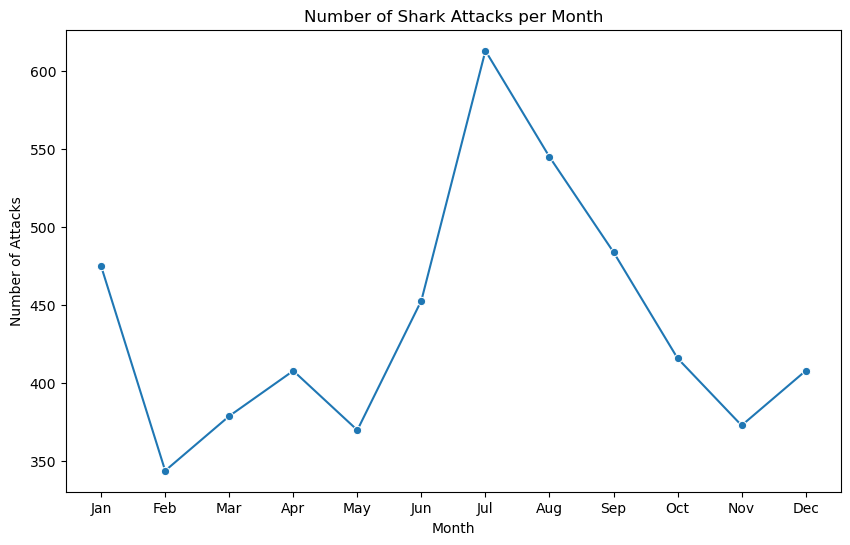

In [48]:
#Plotting the Number of Shark Attacks per Month
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='number of attacks', data=monthly_attacks, marker='o')

# Customize the plot
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set custom labels for the months
plt.title('Number of Shark Attacks per Month')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')

# Show the plot
plt.show()

In [49]:
# Number of shark attacks by region
shark_attack.groupby(['Region']).agg({'Type':'count'}).rename(columns={'Type':'number of attacks'})

,number of attacks
Region,
Caribbean,200
Central America,54
Eastern Africa,138
Eastern Asia,75
Eastern Europe,4
Melanesia,277
Micronesia,26
Middle Africa,1
North America,2618


In [50]:
# Shark attacks by region and month
pivot_shark = shark_attack.pivot_table(index='Region', columns='Month', values=['Type'], aggfunc='count', margins=True, margins_name='Total')
pivot_shark

Type                                                   \
Month                1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0   
Region                                                                      
Caribbean            9.0    8.0    9.0    7.0   14.0   22.0   25.0   22.0   
Central America      2.0    1.0    1.0    3.0    7.0    2.0    4.0    3.0   
Eastern Africa      22.0    5.0    7.0   11.0    7.0    5.0   12.0    8.0   
Eastern Asia         3.0    1.0    3.0    4.0    4.0   12.0   11.0   18.0   
Eastern Europe       NaN    NaN    NaN    NaN    NaN    NaN    1.0    3.0   
Melanesia           15.0   20.0   17.0   13.0   19.0   14.0    4.0    6.0   
Micronesia           1.0    1.0    NaN    3.0    1.0    NaN    1.0    1.0   
North America       63.0   64.0  113.0  176.0  174.0  261.0  389.0  333.0   
Northern Africa      1.0    1.0    2.0    1.0    NaN    6.0    4.0    8.0   
Northern Europe      NaN    1.0    NaN    NaN    1.0    3.0    4.0    4.0   
Oceania            221.0  160.0  133.0  107.0   59.0   61.0   47.0   55.0   
Polynesia            1.0    6.0    4.0    8.0    5.0    1.0    3.0    8.0   
South America       19.0   11.0   20.0   11.0    9.0   12.0   20.0    5.0   
Southeastern Asia    8.0    3.0    4.0    7.0   11.0    7.0    9.0    8.0   
Southern Africa    101.0   52.0   49.0   45.0   39.0   27.0   34.0   23.0   
Southern Asia        NaN    6.0    1.0    2.0    9.0    4.0    NaN    NaN   
Southern Europe      NaN    2.0    6.0    2.0    2.0    8.0   28.0   27.0   
Various              4.0    NaN    2.0    1.0    NaN    2.0    5.0    NaN   
Western Africa       NaN    1.0    1.0    3.0    NaN    NaN    1.0    1.0   
Western Asia         3.0    1.0    3.0    1.0    4.0    2.0    8.0    7.0   
Western Europe       NaN    NaN    NaN    NaN    1.0    1.0    NaN    1.0   
Total              473.0  344.0  375.0  405.0  366.0  450.0  610.0  541.0   

                                                     
Month                9.0   10.0   11.0   12.0 Total  
Region                                               
Caribbean           13.0   13.0    9.0    9.0   160  
Central America      4.0    2.0    6.0    NaN    35  
Eastern Africa       9.0    8.0    6.0   11.0   111  
Eastern Asia         8.0    2.0    2.0    NaN    68  
Eastern Europe       NaN    NaN    NaN    NaN     4  
Melanesia           16.0   10.0   11.0   11.0   156  
Micronesia           5.0    NaN    3.0    2.0    18  
North America      291.0  222.0  124.0   81.0  2291  
Northern Africa      2.0    2.0    5.0    4.0    36  
Northern Europe      7.0    3.0    NaN    NaN    23  
Oceania             59.0  100.0  142.0  194.0  1338  
Polynesia            2.0    2.0    1.0    3.0    44  
South America        8.0    9.0    7.0   11.0   142  
Southeastern Asia    6.0    6.0   10.0    4.0    83  
Southern Africa     21.0   27.0   33.0   64.0   515  
Southern Asia        NaN    NaN    NaN    3.0    25  
Southern Europe     15.0    5.0    1.0    5.0   101  
Various             11.0    1.0    7.0    3.0    36  
Western Africa       1.0    2.0    2.0    NaN    12  
Western Asia         5.0    NaN    1.0    2.0    37  
Western Europe       NaN    NaN    NaN    NaN     3  
Total              483.0  414.0  370.0  407.0  5238

In [51]:
#Modifying the pivot table to be able to plot it (we need to do this because the pivot table has a multindex level)

pivot_shark.reset_index(inplace=True)
pivot_shark.columns = [' '.join(map(str, col)).strip() for col in pivot_shark.columns.values]
filtered_data = pivot_shark[pivot_shark['Region'] != 'Total']
sorted_pivot_table = filtered_data[filtered_data['Region'] != 'Total'].sort_values(by='Type Total', ascending=False)

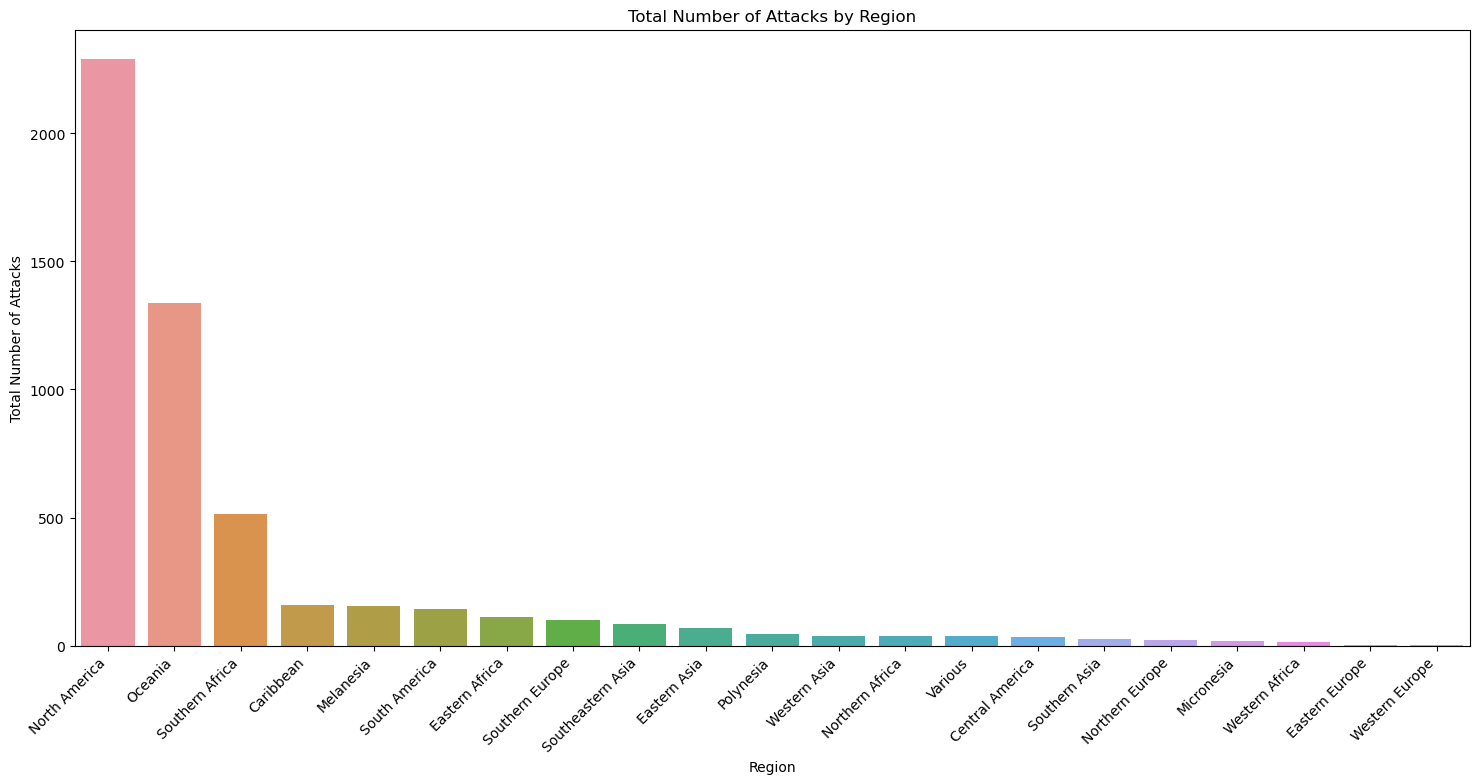

In [52]:
#Plotting the Total Number of Attacks by Region

plt.figure(figsize=(18, 8))

bar_plot = sns.barplot(x='Region', y='Type Total', data=sorted_pivot_table)

plt.xticks(rotation=45,ha='right')
plt.title('Total Number of Attacks by Region')
plt.xlabel('Region')
plt.ylabel('Total Number of Attacks')
plt.show()

In [53]:
print(pivot_shark.columns)

Index(['Region', 'Type 1.0', 'Type 2.0', 'Type 3.0', 'Type 4.0', 'Type 5.0',
       'Type 6.0', 'Type 7.0', 'Type 8.0', 'Type 9.0', 'Type 10.0',
       'Type 11.0', 'Type 12.0', 'Type Total'],
      dtype='object')


c:\Users\ishus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ishus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


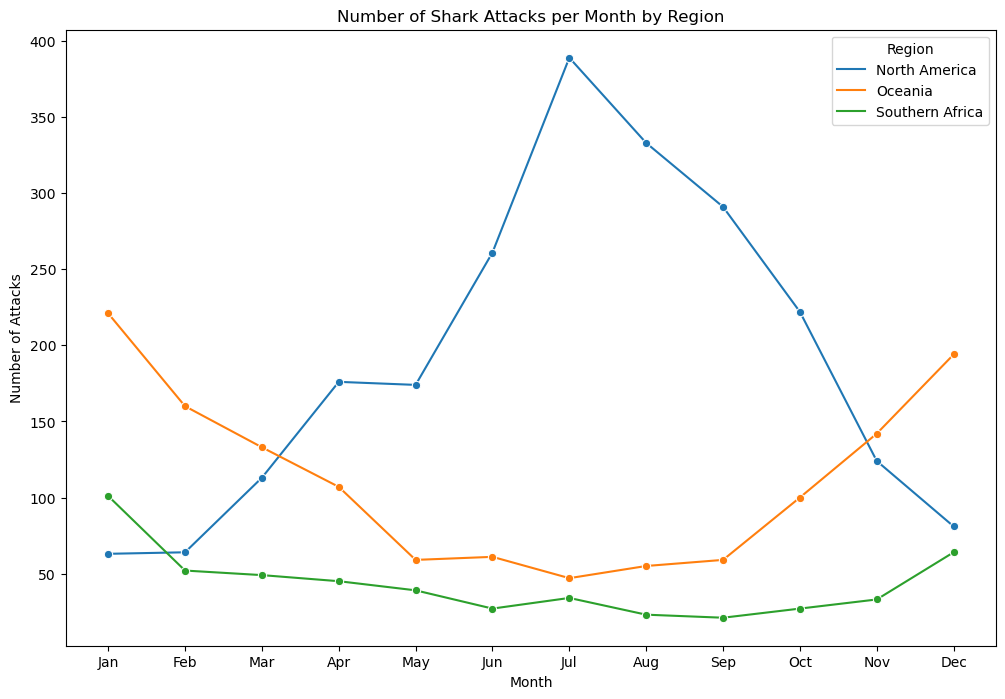

In [54]:
# Plotting the number of shark attacks per month by region 

# We want to focus on the three regions with the largest number of attacks
regions_of_interest = ['North America', 'Oceania', 'Southern Africa']
filtered_regions = pivot_shark[pivot_shark['Region'].isin(regions_of_interest)]

# Melting the DataFrame to be able to plot it
melted_data = filtered_regions.melt(id_vars='Region', 
                                    value_vars=[f'Type {month}.0' for month in range(1, 13)],
                                    var_name='Month', value_name='Number of Attacks')

# Convert 'Month' from 'Type 1.0', 'Type 2.0', etc., to just '1', '2', ..., '12'
melted_data['Month'] = melted_data['Month'].apply(lambda x: x.split()[1].split('.')[0]).astype(int)

plt.figure(figsize=(12, 8))
line_plot = sns.lineplot(data=melted_data, x='Month', y='Number of Attacks', hue='Region', marker='o')

plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Customize x-axis labels
plt.title('Number of Shark Attacks per Month by Region')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.legend(title='Region')
plt.show()

-Summer time in North America: June to August 

-Summer time in Oceania: December to February

-Summer time in Southern Africa: November to March

In [55]:
# Filtering the Oceania region

filter_oceania = shark_attack[shark_attack['Region'] == 'Oceania']
filter_oceania

,Date,Type,Country,State,Location,Sex,Age,Region,Month
0,2024-03-15,Unprovoked,AUSTRALIA,QUEENSLAND,Bargara Beach,F,13.000000,Oceania,3.0
3,2024-02-25,Unprovoked,AUSTRALIA,WESTERN AUSTRALIA,"Sandlnd Island, Jurian Bay",F,46.000000,Oceania,2.0
6,2024-01-29,Unprovoked,AUSTRALIA,NEW SOUTH WALES,"Elizabeth Bay, Sydney Harbor",F,29.000000,Oceania,1.0
8,2024-01-09,Unprovoked,AUSTRALIA,SOUTH AUSTRALIA,"Walkers Beach, Elliston",M,64.000000,Oceania,1.0
12,2023-12-28,Unprovoked,AUSTRALIA,SOUTH AUSTRALIA,Ethel Beach,M,15.000000,Oceania,12.0
...,...,...,...,...,...,...,...,...,...
6903,NaT,Unprovoked,AUSTRALIA,TORRES STRAIT,Thursday Island?,M,28.042954,Oceania,NaN
6919,NaT,Unprovoked,AUSTRALIA,NEW SOUTH WALES,"Spectacle Island, Port Jackson",M,28.042954,Oceania,NaN
6924,NaT,Unprovoked,AUSTRALIA,QUEENSLAND,Great Barrier Reef,M,28.042954,Oceania,NaN
6938,NaT,Unprovoked,AUSTRALIA,NEW SOUTH WALES,,M,28.042954,Oceania,NaN


In [56]:
# Filtering the North America region

filter_na = shark_attack[shark_attack['Region'] == 'North America']
filter_na

,Date,Type,Country,State,Location,Sex,Age,Region,Month
1,2024-03-04,Unprovoked,USA,HAWAII,"Old Man's, Waikiki",M,28.042954,North America,3.0
2,2024-03-02,Unprovoked,USA,HAWAII,"Rainbows, Oahu",F,11.000000,North America,3.0
10,2023-12-30,Unprovoked,USA,HAWAII,"Baby Beach, Maui",M,39.000000,North America,12.0
11,2023-12-29,Unprovoked,MEXICO,SONORA,"Tojahui Beach, Yavaros, Huatabampo",M,22.000000,North America,12.0
16,2023-12-14,Unconfirmed,MEXICO,GUERRERO,"Playa Quieta, Ixtapa, Zihuatanejo",M,66.000000,North America,12.0
...,...,...,...,...,...,...,...,...,...
6891,NaT,Unprovoked,USA,FLORIDA,"Palm Beach, Palm Beach County",M,28.042954,North America,NaN
6925,NaT,Unprovoked,USA,FLORIDA,"Gadsden Point, Tampa Bay",M,28.042954,North America,NaN
6930,NaT,Unprovoked,USA,NORTH CAROLINA,Somewhere between Hatteras and Beaufort,M,28.042954,North America,NaN
6934,NaT,Unprovoked,USA,HAWAII,Puna,F,28.042954,North America,NaN


In [57]:
# Filtering by country USA

filter_usa = shark_attack[shark_attack['Country'] == 'USA']
filter_usa

,Date,Type,Country,State,Location,Sex,Age,Region,Month
1,2024-03-04,Unprovoked,USA,HAWAII,"Old Man's, Waikiki",M,28.042954,North America,3.0
2,2024-03-02,Unprovoked,USA,HAWAII,"Rainbows, Oahu",F,11.000000,North America,3.0
10,2023-12-30,Unprovoked,USA,HAWAII,"Baby Beach, Maui",M,39.000000,North America,12.0
24,2023-11-05,Unprovoked,USA,FLORIDA,"Juno Beach, Palm Beach County",M,66.000000,North America,11.0
29,2023-10-25,Unprovoked,USA,HAWAII,"Pua’ena Point, Haleiwa, Oahu",M,30.000000,North America,10.0
...,...,...,...,...,...,...,...,...,...
6891,NaT,Unprovoked,USA,FLORIDA,"Palm Beach, Palm Beach County",M,28.042954,North America,NaN
6925,NaT,Unprovoked,USA,FLORIDA,"Gadsden Point, Tampa Bay",M,28.042954,North America,NaN
6930,NaT,Unprovoked,USA,NORTH CAROLINA,Somewhere between Hatteras and Beaufort,M,28.042954,North America,NaN
6934,NaT,Unprovoked,USA,HAWAII,Puna,F,28.042954,North America,NaN


In [58]:
# Filtering by State within the US

pivot_usa = filter_usa.pivot_table(index='State', columns='Month', values=['Type'], aggfunc='count', margins=True, margins_name='Total')
pivot_usa 

Type                                                         \
Month            1.0   2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0   
State                                                                         
ALABAMA          NaN   NaN    NaN    1.0    NaN    4.0    4.0    2.0    1.0   
CALIFORNIA      10.0   6.0    8.0    8.0   20.0   26.0   53.0   46.0   40.0   
CONNECTICUT      NaN   NaN    NaN    NaN    NaN    NaN    1.0    2.0    NaN   
DELAWARE         NaN   NaN    NaN    NaN    NaN    1.0    1.0    2.0    NaN   
FLORIDA         22.0  27.0   70.0  115.0   93.0  114.0  140.0  136.0  159.0   
GEORGIA          NaN   NaN    NaN    NaN    2.0    5.0    4.0    3.0    1.0   
HAWAII          17.0  20.0   25.0   30.0   22.0   23.0   17.0   18.0   25.0   
KENTUCKY         NaN   NaN    NaN    NaN    NaN    NaN    1.0    NaN    NaN   
LOUISIANA        1.0   NaN    NaN    NaN    NaN    1.0    2.0    4.0    2.0   
MAINE            NaN   NaN    NaN    NaN    NaN    NaN    1.0    NaN    NaN   
MARYLAND         NaN   NaN    NaN    1.0    NaN    NaN    2.0    5.0    1.0   
MASSACHUSETTS    NaN   1.0    NaN    NaN    NaN    NaN    7.0    4.0    3.0   
MISSISSIPPI      NaN   NaN    NaN    NaN    NaN    NaN    4.0    NaN    NaN   
NEW JERSEY       NaN   NaN    NaN    1.0    2.0    7.0   16.0   11.0    1.0   
NEW MEXICO       NaN   NaN    1.0    NaN    NaN    NaN    NaN    NaN    NaN   
NEW YORK         1.0   NaN    NaN    NaN    NaN    4.0   21.0   10.0    4.0   
NORTH CAROLINA   1.0   1.0    NaN    1.0    4.0   19.0   33.0   28.0   12.0   
OREGON           2.0   1.0    2.0    1.0    NaN    NaN    2.0    3.0    6.0   
Other            NaN   2.0    1.0    2.0    1.0    3.0    6.0    5.0    1.0   
PENNSYLVANIA     NaN   1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
RHODE ISLAND     NaN   NaN    NaN    NaN    NaN    1.0    1.0    3.0    2.0   
SOUTH CAROLINA   1.0   1.0    NaN    2.0   13.0   35.0   38.0   29.0   21.0   
TEXAS            1.0   1.0    NaN    5.0    7.0    9.0   23.0   11.0    3.0   
VIRGINIA         NaN   NaN    NaN    NaN    2.0    1.0    1.0    2.0    2.0   
WASHINGTON       NaN   NaN    NaN    1.0    NaN    NaN    1.0    NaN    NaN   
Total           56.0  61.0  107.0  168.0  166.0  253.0  379.0  324.0  284.0   

                                          
Month            10.0   11.0  12.0 Total  
State                                     
ALABAMA           1.0    NaN   NaN    13  
CALIFORNIA       43.0   23.0  14.0   297  
CONNECTICUT       NaN    NaN   NaN     3  
DELAWARE          NaN    NaN   NaN     4  
FLORIDA         105.0   57.0  20.0  1058  
GEORGIA           NaN    NaN   NaN    15  
HAWAII           43.0   26.0  29.0   295  
KENTUCKY          NaN    NaN   NaN     1  
LOUISIANA         2.0    1.0   NaN    13  
MAINE             1.0    NaN   NaN     2  
MARYLAND          NaN    NaN   NaN     9  
MASSACHUSETTS     NaN    NaN   NaN    15  
MISSISSIPPI       1.0    NaN   NaN     5  
NEW JERSEY        1.0    2.0   1.0    42  
NEW MEXICO        NaN    NaN   NaN     1  
NEW YORK          NaN    NaN   NaN    40  
NORTH CAROLINA    4.0    1.0   1.0   105  
OREGON            7.0    3.0   3.0    30  
Other             1.0    4.0   2.0    28  
PENNSYLVANIA      NaN    NaN   NaN     1  
RHODE ISLAND      NaN    NaN   NaN     7  
SOUTH CAROLINA    3.0    NaN   1.0   144  
TEXAS             3.0    NaN   1.0    64  
VIRGINIA          1.0    1.0   NaN    10  
WASHINGTON        NaN    NaN   NaN     2  
Total           216.0  118.0  72.0  2204

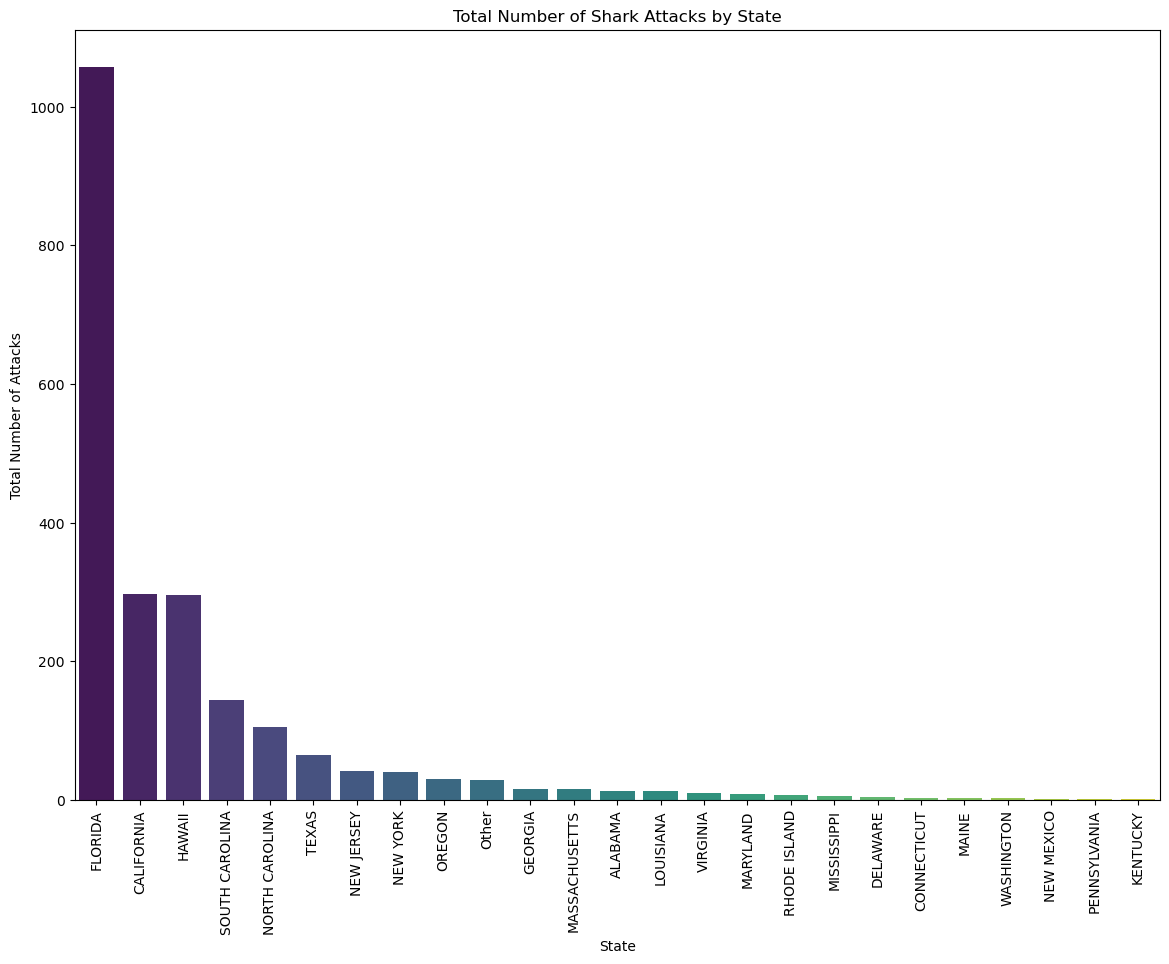

In [59]:
# Modifyng the pivot table to be able to plot it

pivot_usa = pivot_usa[pivot_usa.index != 'Total']
pivot_usa.reset_index(inplace=True)
sorted_pivot_usa = pivot_usa.sort_values(by=('Type', 'Total'), ascending=False)

plt.figure(figsize=(14, 10))

# Create the bar plot
bar_plot = sns.barplot(
    x='State', 
    y=('Type', 'Total'),  # Using a MultiIndex column, specifying the level
    data=sorted_pivot_usa,  
    palette='viridis'
)

# Rotate the state names for better readability
plt.xticks(rotation=90)

# Set the title and labels
plt.title('Total Number of Shark Attacks by State in US')
plt.xlabel('State')
plt.ylabel('Total Number of Attacks')

# Display the plot
plt.show()

In [60]:
# Looking at the attack locations within Florida

filter_florida = shark_attack[shark_attack['State'] == 'FLORIDA']
filter_florida

pivot_florida = filter_florida.pivot_table(index='Location', columns='Month', values=['Type'], aggfunc='count', margins=True, margins_name='Total')
pivot_florida

filter_florida.value_counts()

sorted_by_counts_flo = filter_florida.value_counts().sort_values(ascending=False)

sorted_by_counts_flo

Date        Type        Country  State    Location                          Sex  Age        Region         Month
2014-04-04  Unprovoked  USA      FLORIDA  New Smyrna Beach, Volusia County  M    28.042954  North America  4.0      2
2020-03-22  Unprovoked  USA      FLORIDA  New Smyrna Beach, Volusia County  M    28.042954  North America  3.0      2
2001-08-18  Unprovoked  USA      FLORIDA  New Smyrna Beach, Volusia County  M    19.000000  North America  8.0      2
1995-07-28  Unprovoked  USA      FLORIDA  New Smyrna Beach, Volusia County  M    18.000000  North America  7.0      2
                                                                                 28.042954  North America  7.0      2
                                                                                                                   ..
2023-07-31  Unprovoked  USA      FLORIDA  New Smyrna Beach, Volusia County  M    22.000000  North America  7.0      1
2023-09-04  Unprovoked  USA      FLORIDA  Ponce Inlet, Volusi

In [61]:
# Attacks by month by country in Oceania

pivot_oceania = filter_oceania.pivot_table(index='Country', columns='Month', values=['Type'], aggfunc='count', margins=True, margins_name='Total')
pivot_oceania 

Type                                                            \
Month          1.0    2.0    3.0    4.0   5.0   6.0   7.0   8.0   9.0   10.0   
Country                                                                        
AUSTRALIA    193.0  140.0  120.0  100.0  56.0  58.0  47.0  52.0  57.0   96.0   
NEW BRITAIN    NaN    NaN    NaN    NaN   1.0   1.0   NaN   2.0   NaN    1.0   
NEW ZEALAND   28.0   20.0   13.0    7.0   2.0   2.0   NaN   1.0   2.0    3.0   
Total        221.0  160.0  133.0  107.0  59.0  61.0  47.0  55.0  59.0  100.0   

                                 
Month         11.0   12.0 Total  
Country                          
AUSTRALIA    137.0  173.0  1229  
NEW BRITAIN    NaN    1.0     6  
NEW ZEALAND    5.0   20.0   103  
Total        142.0  194.0  1338

In [62]:
# Attacks by month by country in North America

pivot_na = filter_na.pivot_table(index='Country', columns='Month', values=['Type'], aggfunc='count', margins=True, margins_name='Total')
pivot_na

Type                                                                \
Month     1.0   2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0   10.0   
Country                                                                       
BERMUDA   NaN   NaN    NaN    1.0    1.0    1.0    1.0    2.0    2.0    2.0   
CANADA    1.0   NaN    NaN    NaN    NaN    1.0    3.0    3.0    NaN    NaN   
MEXICO    6.0   3.0    6.0    7.0    7.0    6.0    6.0    4.0    5.0    4.0   
USA      56.0  61.0  107.0  168.0  166.0  253.0  379.0  324.0  284.0  216.0   
Total    63.0  64.0  113.0  176.0  174.0  261.0  389.0  333.0  291.0  222.0   

                            
Month     11.0  12.0 Total  
Country                     
BERMUDA    NaN   NaN    10  
CANADA     NaN   1.0     9  
MEXICO     6.0   7.0    67  
USA      118.0  73.0  2205  
Total    124.0  81.0  2291

In [63]:
# Filtering by country Australia

filter_australia = shark_attack[shark_attack['Country'] == 'AUSTRALIA']
filter_australia

,Date,Type,Country,State,Location,Sex,Age,Region,Month
0,2024-03-15,Unprovoked,AUSTRALIA,QUEENSLAND,Bargara Beach,F,13.000000,Oceania,3.0
3,2024-02-25,Unprovoked,AUSTRALIA,WESTERN AUSTRALIA,"Sandlnd Island, Jurian Bay",F,46.000000,Oceania,2.0
6,2024-01-29,Unprovoked,AUSTRALIA,NEW SOUTH WALES,"Elizabeth Bay, Sydney Harbor",F,29.000000,Oceania,1.0
8,2024-01-09,Unprovoked,AUSTRALIA,SOUTH AUSTRALIA,"Walkers Beach, Elliston",M,64.000000,Oceania,1.0
12,2023-12-28,Unprovoked,AUSTRALIA,SOUTH AUSTRALIA,Ethel Beach,M,15.000000,Oceania,12.0
...,...,...,...,...,...,...,...,...,...
6903,NaT,Unprovoked,AUSTRALIA,TORRES STRAIT,Thursday Island?,M,28.042954,Oceania,NaN
6919,NaT,Unprovoked,AUSTRALIA,NEW SOUTH WALES,"Spectacle Island, Port Jackson",M,28.042954,Oceania,NaN
6924,NaT,Unprovoked,AUSTRALIA,QUEENSLAND,Great Barrier Reef,M,28.042954,Oceania,NaN
6938,NaT,Unprovoked,AUSTRALIA,NEW SOUTH WALES,,M,28.042954,Oceania,NaN


In [64]:
# Filtering by month by state within Australia

pivot_australia = filter_australia.pivot_table(index='State', columns='Month', values=['Type'], aggfunc='count', margins=True, margins_name='Total')
pivot_australia

Type                                                     \
Month                 1.0    2.0    3.0    4.0   5.0   6.0   7.0   8.0   9.0   
State                                                                          
NEW  SOUTH WALES      1.0    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   
NEW SOUTH ALES        NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   
NEW SOUTH WALES      85.0   59.0   51.0   44.0  20.0  20.0   9.0  16.0  15.0   
NORTHERN TERRITORY    1.0    1.0    2.0    1.0   1.0   1.0   NaN   1.0   3.0   
QUEENSLAND           41.0   33.0   22.0   23.0  15.0   7.0  12.0  15.0  14.0   
SOUTH AUSTRALIA      13.0   10.0   13.0    5.0   3.0   5.0   1.0   4.0   8.0   
TASMANIA              6.0    5.0    1.0    1.0   NaN   3.0   5.0   3.0   NaN   
TORRES STRAIT         6.0    3.0    4.0    5.0   3.0   3.0   3.0   4.0   1.0   
VICTORIA             11.0   12.0   11.0    5.0   3.0   5.0   5.0   1.0   3.0   
WESTERM AUSTRALIA     NaN    NaN    NaN    NaN   NaN   NaN   NaN   1.0   1.0   
WESTERN  AUSTRALIA    NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   
WESTERN AUSTRALIA    29.0   17.0   16.0   16.0   9.0  14.0  12.0   7.0  12.0   
Total               193.0  140.0  120.0  100.0  54.0  58.0  47.0  52.0  57.0   

                                              
Month               10.0   11.0   12.0 Total  
State                                         
NEW  SOUTH WALES     NaN    NaN    NaN     1  
NEW SOUTH ALES       NaN    NaN    1.0     1  
NEW SOUTH WALES     32.0   37.0   72.0   460  
NORTHERN TERRITORY   3.0    3.0    2.0    19  
QUEENSLAND          22.0   46.0   44.0   294  
SOUTH AUSTRALIA      7.0    5.0   19.0    93  
TASMANIA             1.0    NaN    2.0    27  
TORRES STRAIT        3.0    7.0    3.0    45  
VICTORIA             7.0    8.0   12.0    83  
WESTERM AUSTRALIA    NaN    1.0    NaN     3  
WESTERN  AUSTRALIA   1.0    NaN    NaN     1  
WESTERN AUSTRALIA   20.0   30.0   18.0   200  
Total               96.0  137.0  173.0  1227

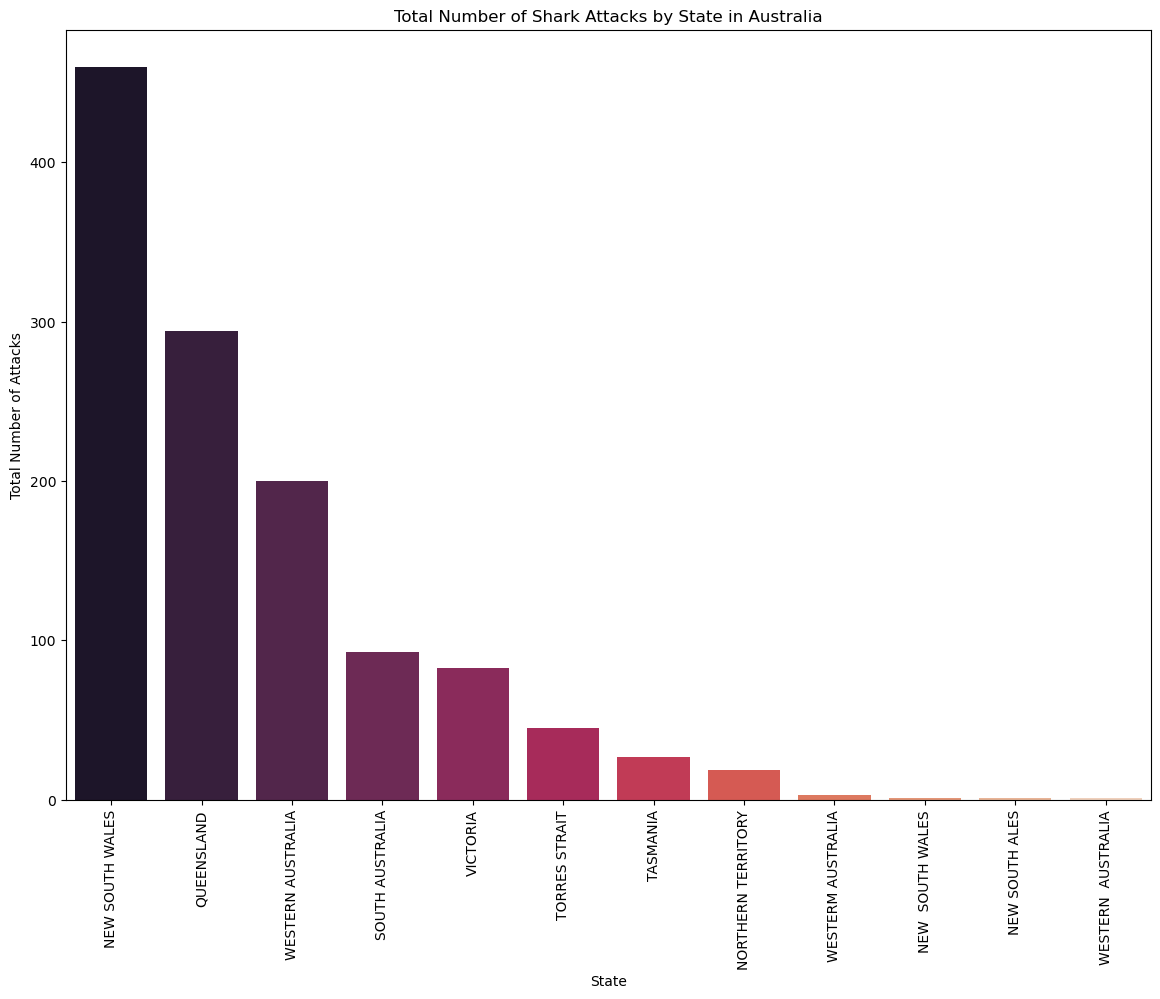

In [68]:
# Modifyng the pivot table to be able to plot it

pivot_australia = pivot_australia[pivot_australia.index != 'Total']
pivot_australia.reset_index(inplace=True)
sorted_pivot_australia = pivot_australia.sort_values(by=('Type', 'Total'), ascending=False)

plt.figure(figsize=(14, 10))

# Create the bar plot
bar_plot = sns.barplot(
    x='State', 
    y=('Type', 'Total'),  # Using a MultiIndex column, specifying the level
    data=sorted_pivot_australia,  
    palette='rocket'
)

# Rotate the state names for better readability
plt.xticks(rotation=90)

# Set the title and labels
plt.title('Total Number of Shark Attacks by State in Australia')
plt.xlabel('State')
plt.ylabel('Total Number of Attacks')

# Display the plot
plt.show()

In [ ]:
# Filter the DataFrame for rows where the country is Australia
filter_aus = shark_attack[shark_attack['Country'] == 'AUSTRALIA']

# Now, retrieve all location entries from the filtered DataFrame
all_locations_aus = filter_aus['Location'].tolist()
all_locations_auscorrections={
    "Sandlnd Island, Jurian Bay": "Sandland Island, Jurien Bay",
    "Elizabeth Bay, Sydney Harbor": "Elizabeth Bay, Sydney Harbour",
    "Lighthouse Beach, Port Macquarie ": "Lighthouse Beach, Port Macquarie",
    "Gnarabup Beach ": "Gnarabup Beach",
    "Kurrajong Campground, Exnouth": "Kurrajong Campground, Exmouth",
    "Freemantle": "Fremantle",
    "Crowdy Baay": "Crowdy Bay",
    "Buchan Point, Sydney": "Buchan Point, Sydney",
    "Tantabitti Beach, Nigaloo": "Tantabiddi Beach, Ningaloo",
    "Cull Island / Esperance": "Cull Island, Esperance",
    "Woorim Beach, Bribie Island,": "Woorim Beach, Bribie Island",
    "Pyramids Beach, Mandurah": "Pyramids Beach, Mandurah",
    "Guillotines surf break, Shire of Augusta Margaret River": "Guillotines Surf Break, Augusta Margaret River",
    "Two Rocks near Three Mile Reef": "Two Rocks, Three Mile Reef",
    "Swain Reef": "Swain Reef",
    "Narrabeen Lagoon": "Narrabeen Lagoon",
    "South Kurrajong": "South Kurrajong",
    "Main Beach, Byron Bay": "Main Beach, Byron Bay",
    "Bar Beach, Newcastle": "Bar Beach, Newcastle"
}
filter_aus['Location'] = filter_aus['Location'].astype(str)# Using the replace function with the corrections dictionary to update the DataFrame
filter_aus['Location'].replace(corrections, inplace=True)

### Extra: Analysis for some other time

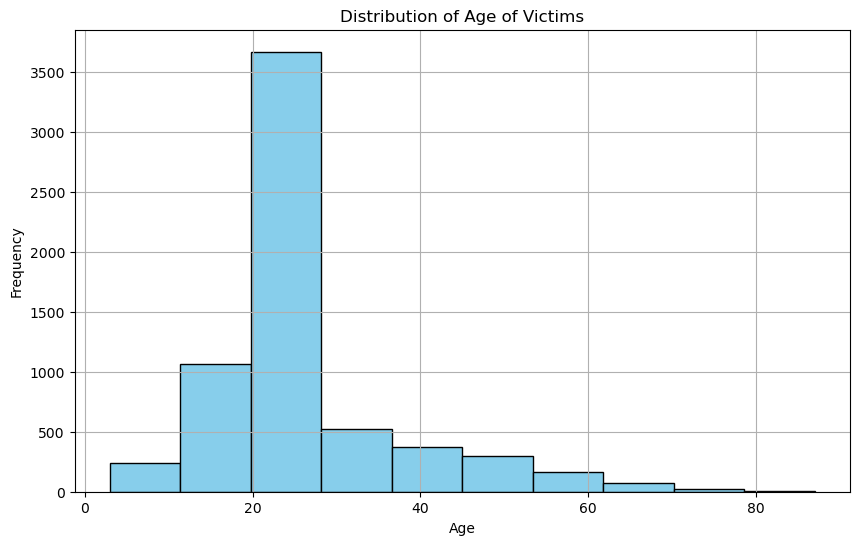

In [ ]:
#Age distribution

plt.figure(figsize=(10, 6))
plt.hist(shark_attack['Age'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Age of Victims')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The vast majority of victims are in their 20s